# PreProcessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("d:/Datasets/flipkart_data.csv")
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [3]:
df.shape

(9976, 2)

In [4]:
df.sample()['review'].values

array(['This headset is amazing and sound quality is very good thanks to Boat and FlipkartREAD MORE'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [6]:
df.isnull().sum()

review    0
rating    0
dtype: int64

In [7]:
df[df['review'].isna()]

,review,rating


In [8]:
df[df['review'].isna()]['rating'].value_counts()

Series([], Name: count, dtype: int64)

In [9]:
df.duplicated().sum()

2108

In [10]:
df[df.duplicated()]

,review,rating
1702,very goodREAD MORE,5
1879,Good productREAD MORE,4
1889,Nice productREAD MORE,5
1984,SuperREAD MORE,5
1992,niceREAD MORE,5
...,...,...
9969,Nice productREAD MORE,5
9970,GoodREAD MORE,5
9971,GoodREAD MORE,5
9973,GoodREAD MORE,5


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df[(df['review'].str.strip() == '')]

,review,rating


In [14]:
df = df[~(df['review'].str.strip() == '')]

In [15]:
# Convert the 'clean_comment' column to lowercase
df['review'] = df['review'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()

,review,rating
0,it was nice produt. i like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,i think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [16]:
df[df['review'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,review,rating


In [17]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['review'] = df['review'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['review'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

In [18]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['review'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,review,rating


In [19]:
df.head()

,review,rating
0,it was nice produt. i like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,i think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [20]:
# Identify comments containing new line characters
comments_with_newline = df[df['review'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()


,review,rating


In [21]:
# Remove new line characters from the 'review' column
df['review'] = df['review'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['review'].str.contains('\n')]
comments_with_newline_remaining


,review,rating


# EDA

<Axes: xlabel='rating', ylabel='count'>

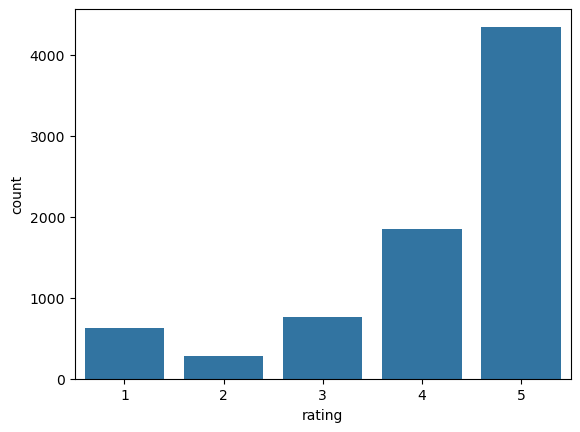

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="rating")

In [23]:
# frequency distribution of sentiments

df['review'].value_counts(normalize=True).mul(100).round(2)

review
good productread more                           0.11
very goodread more                              0.10
okread more                                     0.10
goodread more                                   0.09
nice productread more                           0.09
                                                ... 
i love 💕💕 you boat 💕💕read more                  0.01
very good and quality productsread more         0.01
good working headphone nice 👍👍👍read more        0.01
pasia wasool osme bassread more                 0.01
best headphone i have ever used....read more    0.01
Name: proportion, Length: 7599, dtype: float64

In [24]:
# Counts the Number of words each sentence have
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

In [25]:
df.sample(5)

,review,rating,word_count
9864,decent and value for moneyread more,5,6
7384,please don't buy .........the cushions are not...,1,17
69,bought it for 999 it's definitely worth for th...,4,91
2062,it starts hurting your ears within 5 mins of u...,5,24
8333,product is extremly fragile and may not work i...,1,36


In [26]:
df['word_count'].describe()

count    7868.000000
mean       19.847483
std        20.952108
min         2.000000
25%         6.000000
50%        12.000000
75%        26.000000
max       106.000000
Name: word_count, dtype: float64

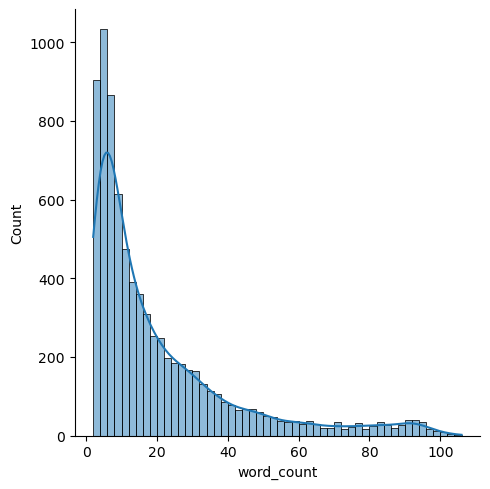

In [27]:
sns.displot(df['word_count'], kde=True)

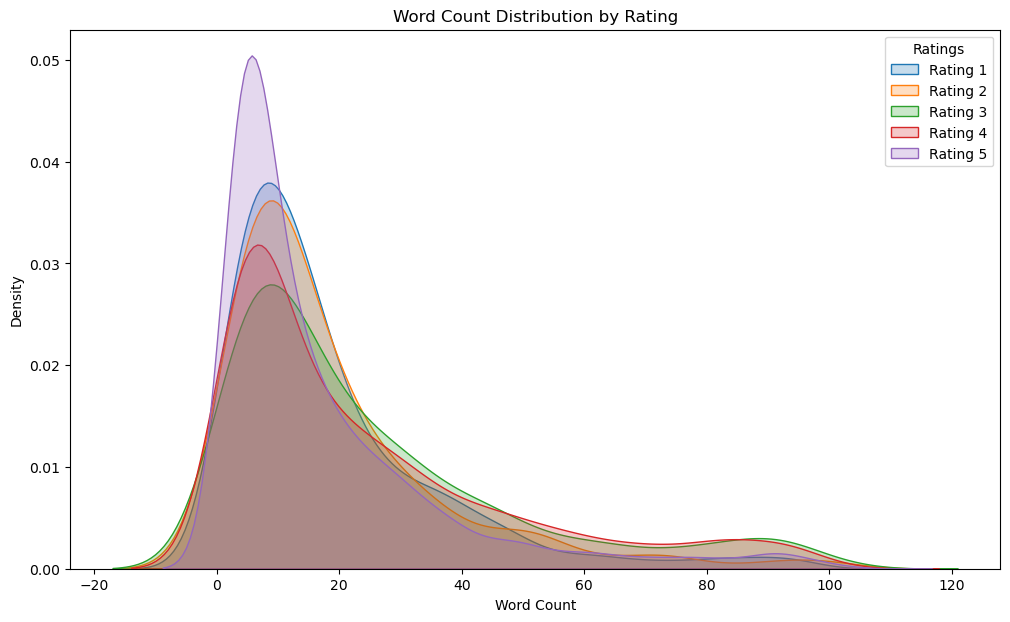

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for word count if not already present
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

# Create the figure and axes
plt.figure(figsize=(12, 7))

# Plot KDE for each rating (1 to 5)
for rating in sorted(df['rating'].unique()):
    sns.kdeplot(
        df[df['rating'] == rating]['word_count'], 
        label=f'Rating {rating}', 
        fill=True
    )

# Add title and labels
plt.title('Word Count Distribution by Rating')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend(title='Ratings')

# Show the plot
plt.show()


<Axes: ylabel='word_count'>

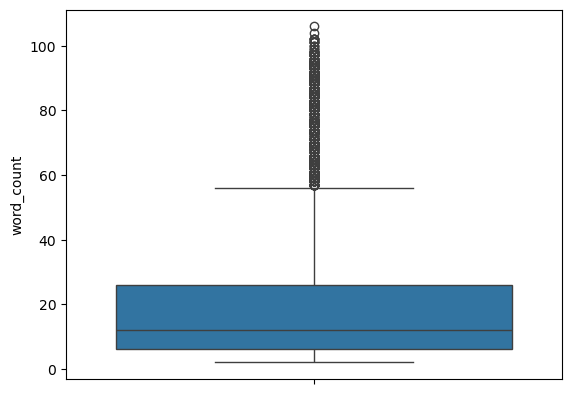

In [29]:
sns.boxplot(df['word_count'])

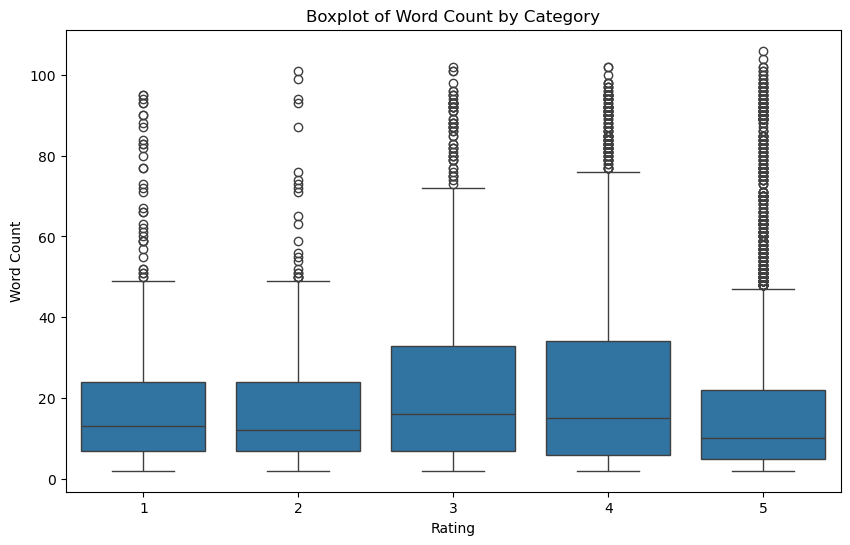

In [30]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.show()

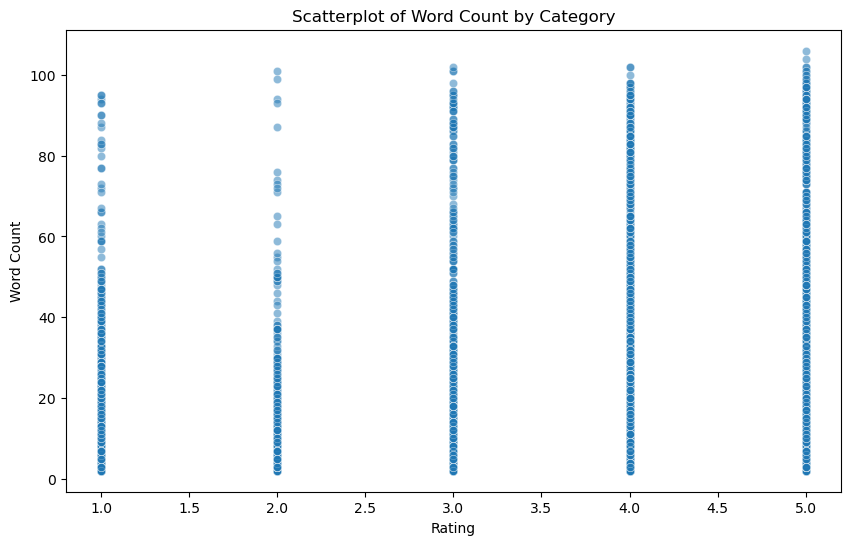

In [31]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='rating', ylabel='word_count'>

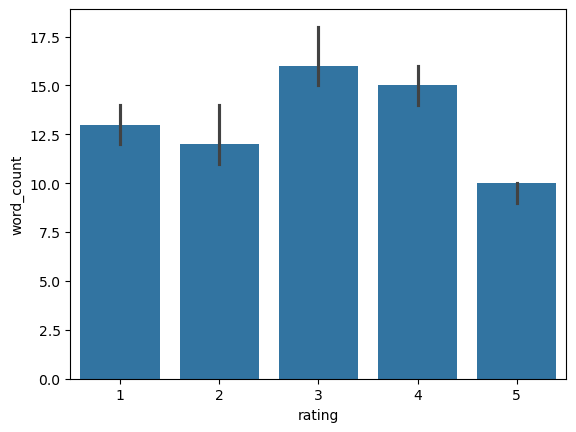

In [32]:
# median word counts among sentiments

sns.barplot(df,x='rating',y='word_count',estimator='median')

In [34]:
df.head()

,review,rating,word_count
0,it was nice produt. i like it's design a lot. ...,5,18
1,awesome sound....very pretty to see this nd th...,5,24
2,awesome sound quality. pros 7-8 hrs of battery...,4,80
3,i think it is such a good product not only as ...,5,81
4,awesome bass sound quality very good bettary l...,5,24


In [35]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['review'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\td334\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df.sample(3)

,review,rating,word_count,num_stop_words
4868,the product was good but the warranty was wast...,5,15,10
8244,best headset under this price range. better so...,5,48,21
3111,good product and quality.read more,5,5,2


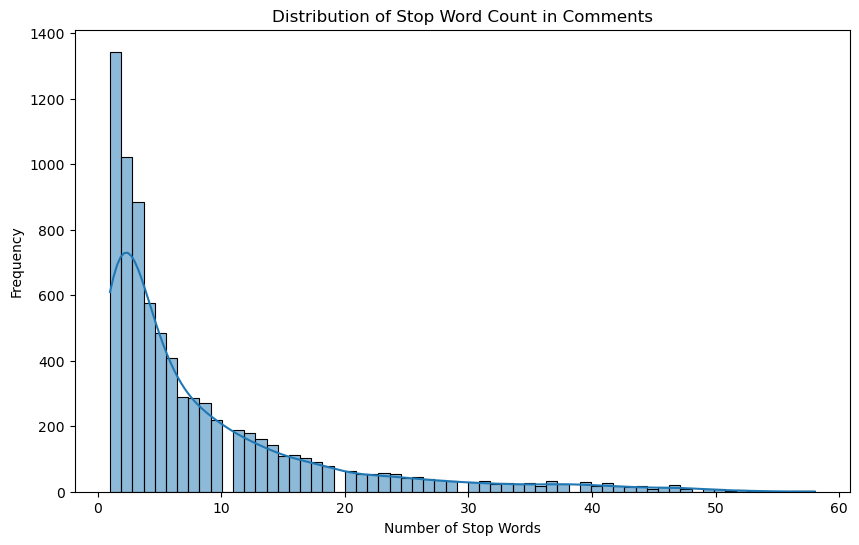

In [38]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\td334\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


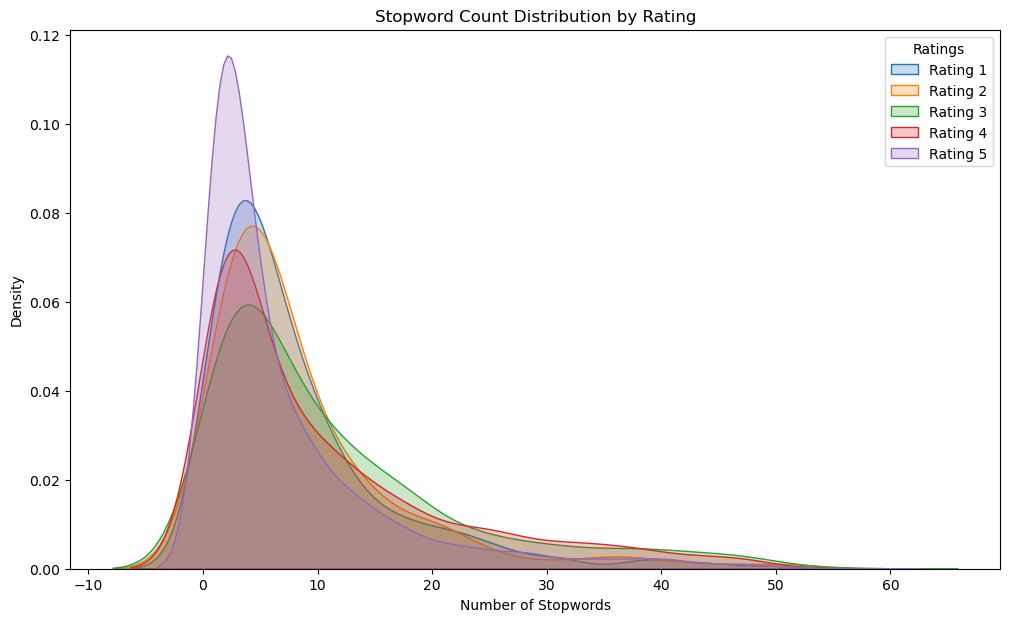

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Create a new column: number of stopwords in each review
df['num_stop_words'] = df['review'].apply(lambda x: sum(1 for word in x.split() if word.lower() in stop_words))

# Create the figure and axes
plt.figure(figsize=(12, 7))

# Plot KDE for each rating (1 to 5)
for rating in sorted(df['rating'].unique()):
    sns.kdeplot(
        df[df['rating'] == rating]['num_stop_words'], 
        label=f'Rating {rating}', 
        fill=True
    )

# Add title and labels
plt.title('Stopword Count Distribution by Rating')
plt.xlabel('Number of Stopwords')
plt.ylabel('Density')

# Add a legend
plt.legend(title='Ratings')

# Show the plot
plt.show()


<Axes: xlabel='rating', ylabel='num_stop_words'>

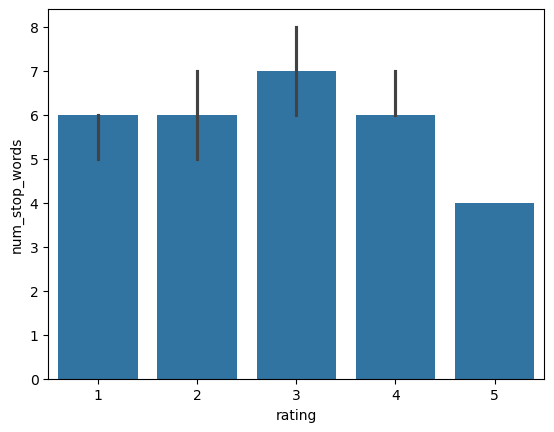

In [40]:
# median word counts among sentiments

sns.barplot(df,x='rating',y='num_stop_words',estimator='median')

C:\Users\td334\AppData\Local\Temp\ipykernel_14952\136101944.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


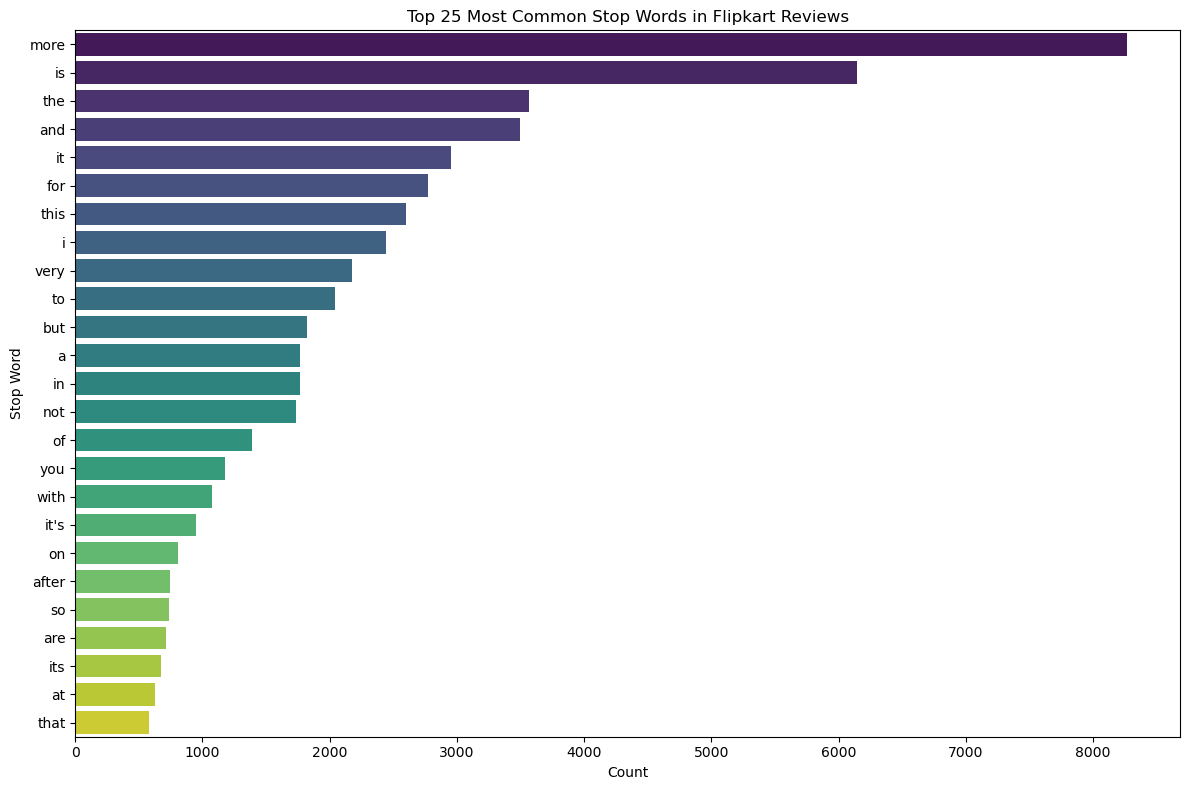

In [42]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

stop_words = set(stopwords.words('english'))

# Extract all stop words from the 'review' column
all_stop_words = [
    word.lower()
    for review in df['review']
    for word in review.split()
    if word.lower() in stop_words
]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert to DataFrame
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words in Flipkart Reviews')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.tight_layout()
plt.show()

In [43]:
df['num_chars'] = df['review'].apply(len)

df.head()

,review,rating,word_count,num_stop_words,num_chars
0,it was nice produt. i like it's design a lot. ...,5,18,8,98
1,awesome sound....very pretty to see this nd th...,5,24,10,134
2,awesome sound quality. pros 7-8 hrs of battery...,4,80,28,499
3,i think it is such a good product not only as ...,5,81,44,405
4,awesome bass sound quality very good bettary l...,5,24,9,144


In [44]:
df['num_chars'].describe()

count    7868.000000
mean      113.993010
std       115.642085
min        11.000000
25%        34.000000
50%        70.000000
75%       149.000000
max       509.000000
Name: num_chars, dtype: float64

In [46]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['review'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [47]:
char_frequency_df['character'].values

array([' ', 'e', 'o', 't', 'a', 'r', 'i', 's', 'n', 'd', 'u', 'l', 'h',
       'm', 'c', '.', 'b', 'g', 'y', 'p', 'f', 'w', 'v', 'k', 'q', ',',
       "'", '0', 'x', '1', '9', 'z', 'j', '👍', '5', '2', '!', '-', '4',
       '3', '👌', ')', '😍', '/', '️', '(', '8', '❤', ':', '6', '&', '7',
       '😘', '😊', '🔥', '?', '😀', '🥰', '🎧', '😎', '🤩', '@', '☺', '%', '*',
       '🏻', '#', '₹', '’', '"', '⭐', '😁', '💯', '♥', '🤗', '🙏', '+', '💓',
       '🌟', '😡', '😃', '🙂', '🤘', ';', '•', '✌', '🔊', '😉', '👏', '😠', '❣',
       '=', '_', '😇', '😔', '💕', '💐', '👂', '👎', '😌', '🥳', '>', '~', '💞',
       '💝', '🌹', '|', '💖', '💰', '👉', '😂', '🔋', '😜', '𝑜', '𝑒', '🤙', '𝑡',
       '𝑠', '🤟', '➡', '🖤', '✨', '🤔', '😋', '🎶', '💪', '💛', '𝑑', '😻', '𝑖',
       '𝑟', '☹', '😚', '😭', '😄', '🔛', '🕺', '…', '⚡', '😅', '𝑢', '★', '😞',
       '𝑎', '🥇', '✊', '∆', '🤝', '😛', '💗', '💙', '𝑛', '©', '🗣', '😒', '💜',
       '😕', '🙆', '✓', '🙃', 'ø', '💥', '👈', 'ś', '𝑓', '😑', '$', '🧐', '🦊',
       '\u200b', 'í', '👿', 'à', '🎻', '💵', '𝑐', '🌚', '😲', '❌', '✔

In [48]:
char_frequency_df.tail(50)

,character,frequency
241,ℎ,1
173,🆗,1
190,❇,1
126,♂,1
186,😱,1
184,😐,1
183,😏,1
181,🤭,1
177,👻,1
176,💣,1


In [49]:
char_frequency_df.head(50)

,character,frequency
2,,158938
8,e,81181
11,o,65834
1,t,59324
4,a,54795
10,r,51347
0,i,49260
5,s,45545
6,n,37723
12,d,35627


In [50]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['review'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,review,rating,word_count,num_stop_words,num_chars,num_punctuation_chars
3443,very nice sounds and bass it is very niceread...,5,10,6,51,0
1212,brilliant headphones. sound quality is very ex...,5,36,14,234,7
2661,good but battry is not fast chargingread more,4,8,4,45,0
3773,fully satisfied with the product n features. ...,5,27,6,160,3
1075,it's very gud product i like this boat headpho...,5,30,12,162,1


In [51]:
df['num_punctuation_chars'].describe()

count    7868.000000
mean        3.323081
std         5.221212
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        71.000000
Name: num_punctuation_chars, dtype: float64

C:\Users\td334\AppData\Local\Temp\ipykernel_14952\2890674929.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='score', y='bigram', palette='magma')


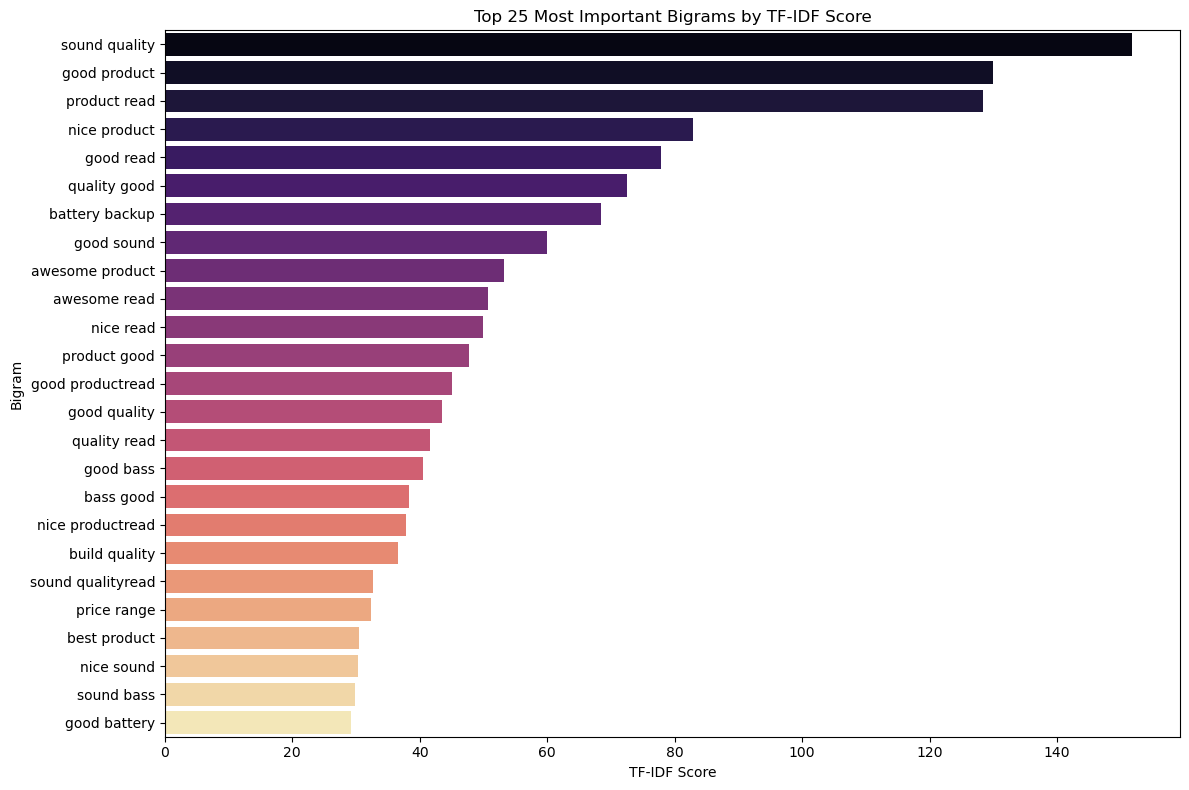

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to extract top N bigrams by cumulative TF-IDF score
def get_top_tfidf_ngrams(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    tfidf_matrix = vec.transform(corpus)
    sum_tfidf = tfidf_matrix.sum(axis=0)
    tfidf_scores = [(word, sum_tfidf[0, idx]) for word, idx in vec.vocabulary_.items()]
    tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
    return tfidf_scores[:n]

# Get the top 25 bigrams by TF-IDF score
top_25_bigrams = get_top_tfidf_ngrams(df['review'], 25)

# Convert to DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'score'])

# Plot the TF-IDF score of the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='score', y='bigram', palette='magma')
plt.title('Top 25 Most Important Bigrams by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()


C:\Users\td334\AppData\Local\Temp\ipykernel_14952\1596301342.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='score', y='trigram', palette='coolwarm')


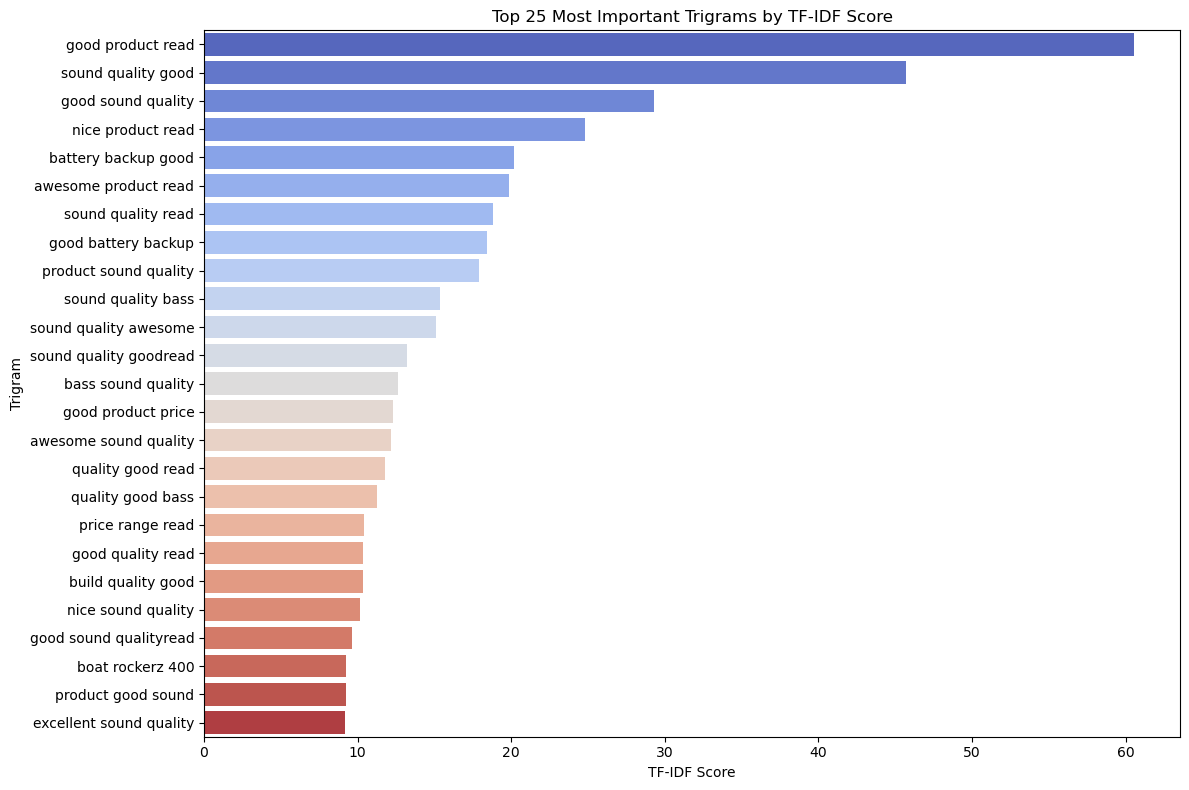

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to extract top N trigrams by cumulative TF-IDF score
def get_top_tfidf_trigrams(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    tfidf_matrix = vec.transform(corpus)
    sum_tfidf = tfidf_matrix.sum(axis=0)
    tfidf_scores = [(word, sum_tfidf[0, idx]) for word, idx in vec.vocabulary_.items()]
    tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
    return tfidf_scores[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_tfidf_trigrams(df['review'], 25)

# Convert to DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'score'])

# Plot the TF-IDF score of the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='score', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Important Trigrams by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


In [55]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_review'] = df['review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [56]:
all_text = ' '.join(df['clean_review'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
2,,158938
8,e,81181
11,o,65834
1,t,59324
4,a,54795
10,r,51347
0,i,49260
5,s,45545
6,n,37723
12,d,35627


In [57]:
char_frequency_df.tail(3)

,character,frequency
38,6,176
23,7,137
40,?,89


In [58]:
df.tail()

,review,rating,word_count,num_stop_words,num_chars,num_punctuation_chars,clean_review
9965,good headphoneread more,4,3,1,23,0,good headphoneread more
9967,bad product.read more,1,3,1,21,1,bad product.read more
9968,it's tight and not more comfortableread more,4,7,5,44,1,its tight and not more comfortableread more
9972,everything is amazimg but the built is very li...,5,10,6,60,2,everything is amazimg but the built is very li...
9974,best headphone i have ever used....read more,5,7,3,44,4,best headphone i have ever used....read more


In [59]:
# Drop only the 'review' column
df = df.drop(columns=['review'])

# Display the updated DataFrame
df.head()


,rating,word_count,num_stop_words,num_chars,num_punctuation_chars,clean_review
0,5,18,8,98,7,it was nice produt. i like its design a lot. ...
1,5,24,10,134,4,awesome sound....very pretty to see this nd th...
2,4,80,28,499,21,awesome sound quality. pros 78 hrs of battery ...
3,5,81,44,405,6,i think it is such a good product not only as ...
4,5,24,9,144,2,awesome bass sound quality very good bettary l...


In [ ]:
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already done
nltk.download('stopwords')

# Define stopwords excluding sentiment-relevant ones
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stopwords from 'clean_review' column, keeping essential ones
df['clean_review'] = df['clean_review'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

#Show the result
df[['clean_review']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\td334\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,clean_review
0,nice produt. like design lot. easy carry. and....
1,awesome sound....very pretty see nd sound qual...
2,awesome sound quality. pros 78 hrs battery lif...
3,think good product not per quality but also de...
4,awesome bass sound quality good bettary long l...


In [62]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_review'] = df['clean_review'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\td334\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,word_count,num_stop_words,num_chars,num_punctuation_chars,clean_review
0,5,18,8,98,7,nice produt. like design lot. easy carry. and....
1,5,24,10,134,4,awesome sound....very pretty see nd sound qual...
2,4,80,28,499,21,awesome sound quality. pro 78 hr battery life ...
3,5,81,44,405,6,think good product not per quality but also de...
4,5,24,9,144,2,awesome bass sound quality good bettary long l...


In [64]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


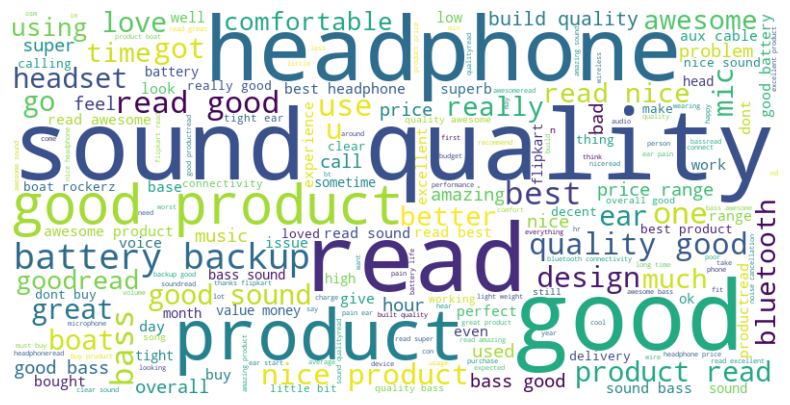

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_review'])

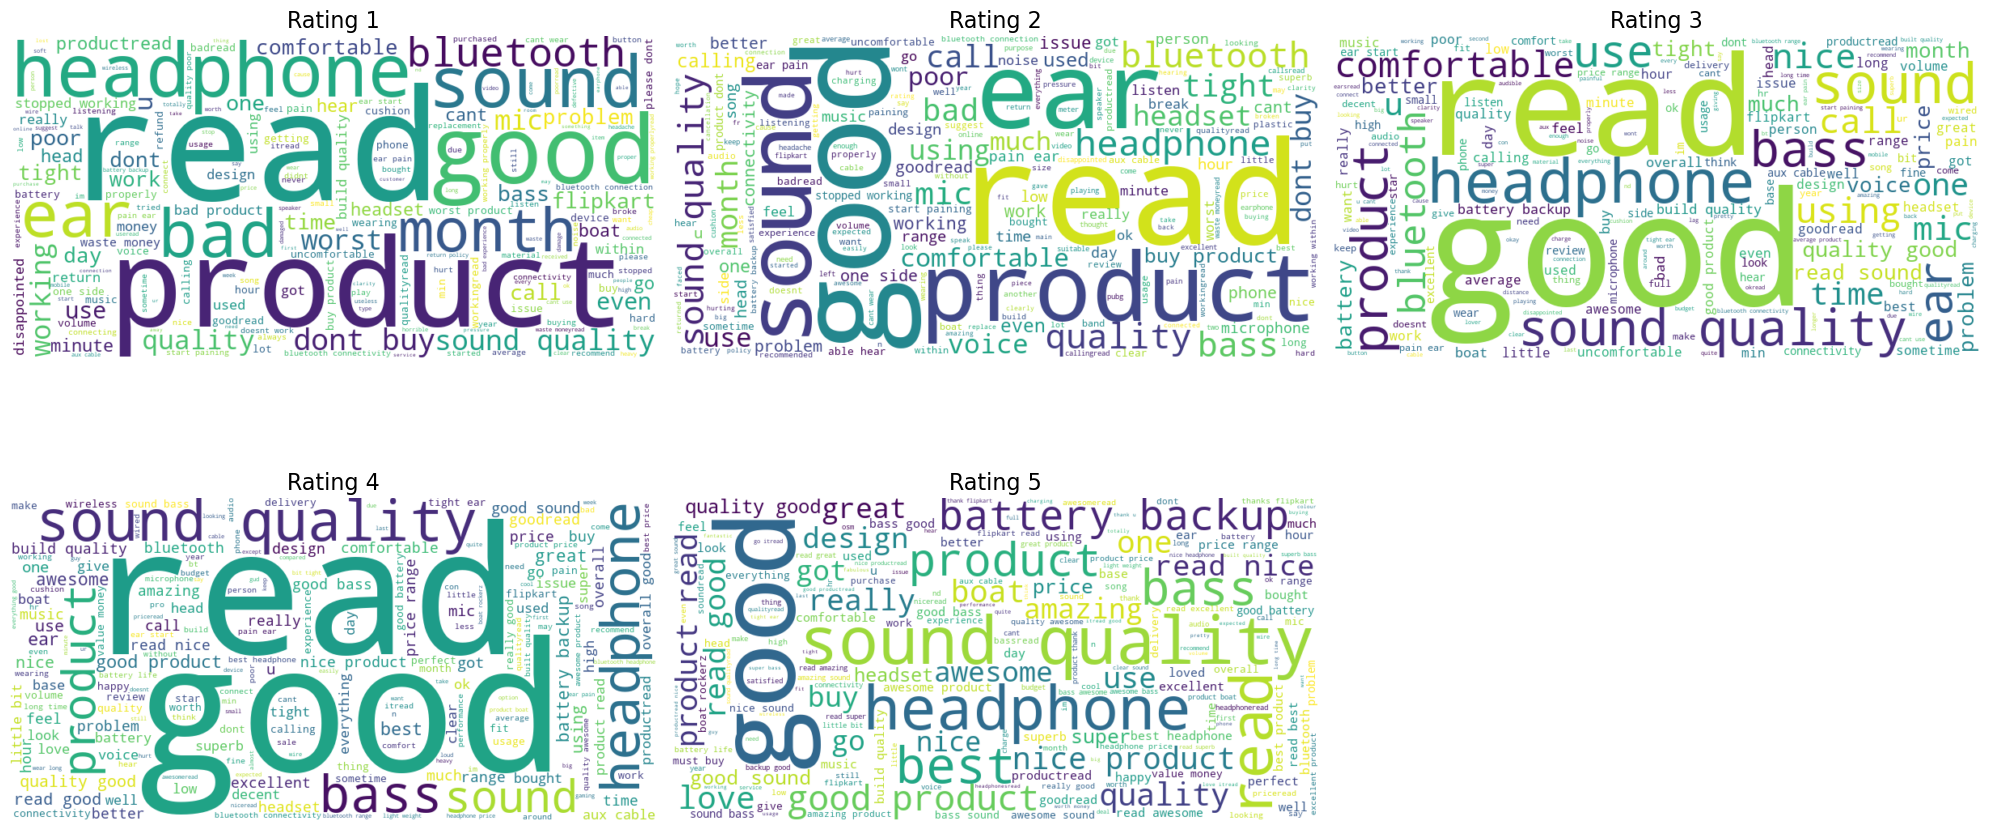

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordclouds_by_rating(df, text_col='clean_review', rating_col='rating'):
    unique_ratings = sorted(df[rating_col].unique())
    plt.figure(figsize=(20, 10))

    for i, rating in enumerate(unique_ratings, 1):
        text = ' '.join(df[df[rating_col] == rating][text_col])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.subplot(2, 3, i)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Rating {rating}', fontsize=16)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
plot_wordclouds_by_rating(df)


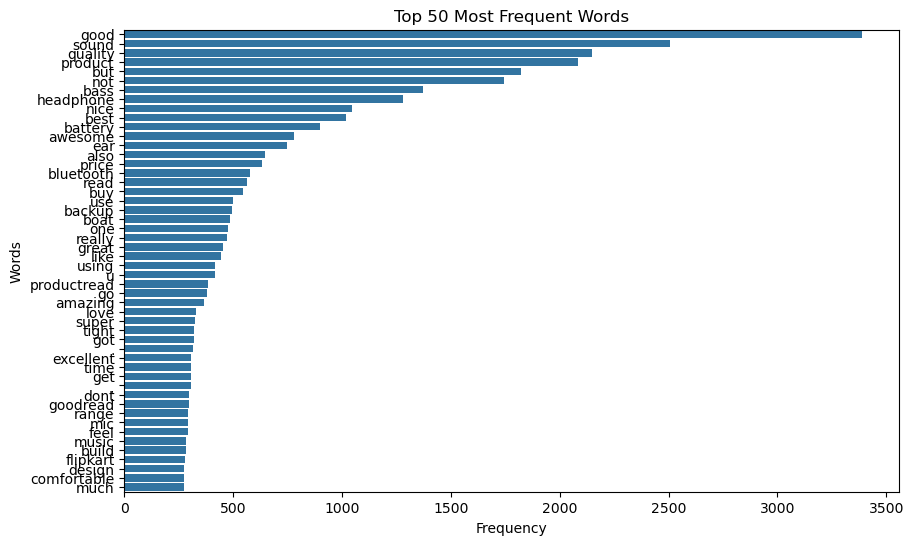

In [67]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_review']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


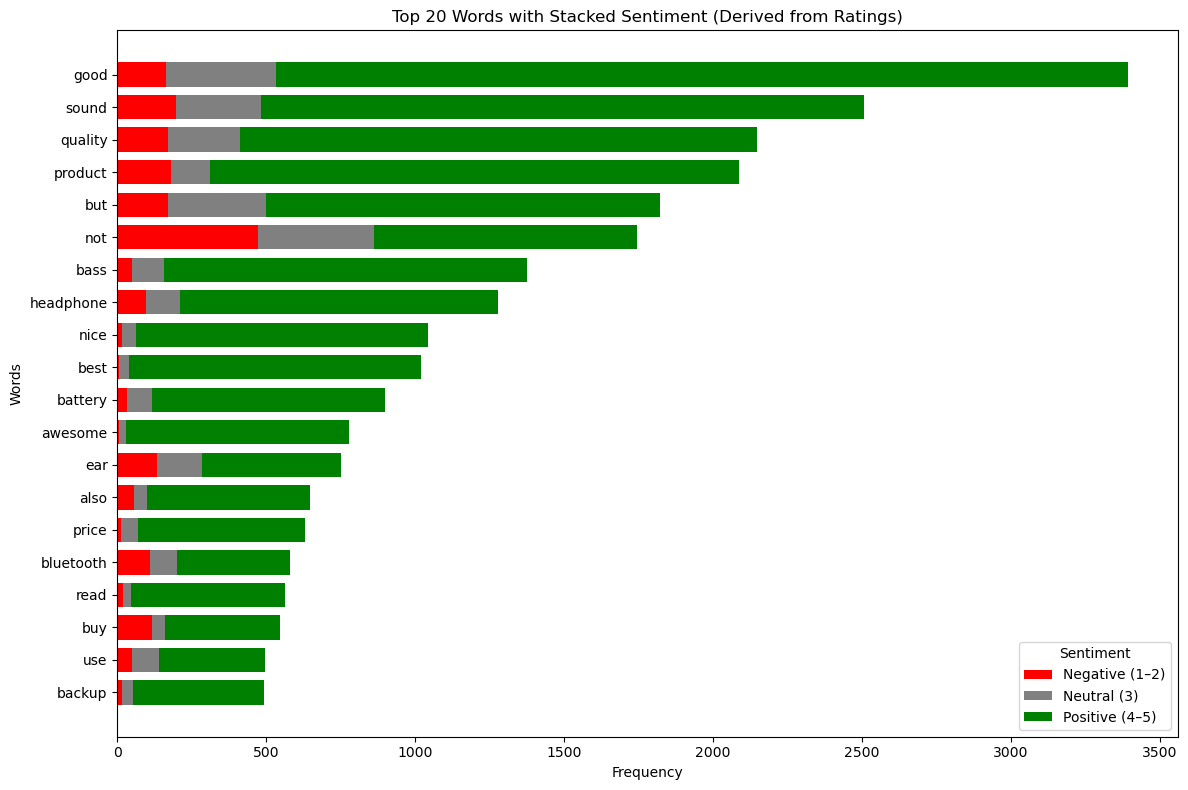

In [69]:
import matplotlib.pyplot as plt

def plot_top_n_words_by_sentiment(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment categories derived from rating."""

    # Step 1: Convert rating (1-5) to sentiment category (-1, 0, 1)
    def map_sentiment(rating):
        if rating <= 2:
            return -1
        elif rating == 3:
            return 0
        else:
            return 1

    df['category'] = df['rating'].apply(map_sentiment)

    # Step 2: Count words per sentiment
    word_category_counts = {}

    for _, row in df.iterrows():
        words = row['clean_review'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1: 0, 0: 0, 1: 0}
            word_category_counts[word][category] += 1

    # Step 3: Get top N words by total frequency
    total_word_counts = {word: sum(c.values()) for word, c in word_category_counts.items()}
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Step 4: Prepare data for stacked plot
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts  = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Step 5: Plot
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    plt.barh(top_words, negative_counts, color='red', label='Negative (1–2)', height=bar_width)
    plt.barh(top_words, neutral_counts, left=negative_counts, color='gray', label='Neutral (3)', height=bar_width)
    plt.barh(top_words, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (4–5)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Words with Stacked Sentiment (Derived from Ratings)')
    plt.legend(title='Sentiment')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Call the function
plot_top_n_words_by_sentiment(df, n=20)
